In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving headbrain.csv to headbrain.csv


In [3]:
bas_beyin=pd.read_csv('headbrain.csv')
bas_beyin.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Text(0.5, 1.0, 'Corelation heatmap')

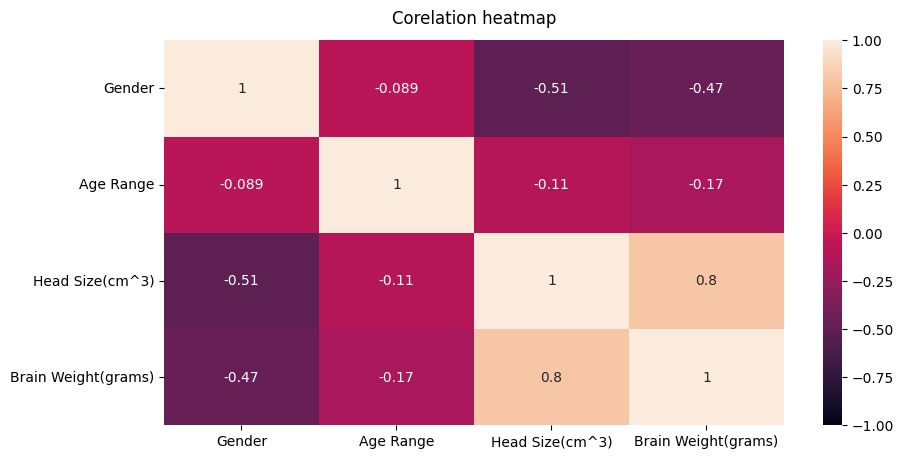

In [5]:
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(bas_beyin.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Corelation heatmap',fontdict={'fontsize':12},pad=12)

In [6]:
x=bas_beyin['Head Size(cm^3)'].values
y=bas_beyin['Brain Weight(grams)'].values

In [7]:
print(x.shape)
print(type(x))

(237,)
<class 'numpy.ndarray'>


In [8]:
uzunluk=len(x)
x=x.reshape(uzunluk,1)
print(x.shape)
print(type(x))

(237, 1)
<class 'numpy.ndarray'>


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
prediction=lm.predict(x_test)

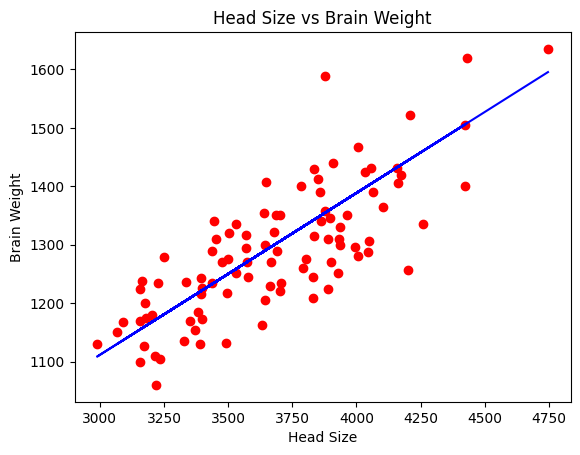

In [16]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,prediction,color='blue')
plt.title('Head Size vs Brain Weight')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

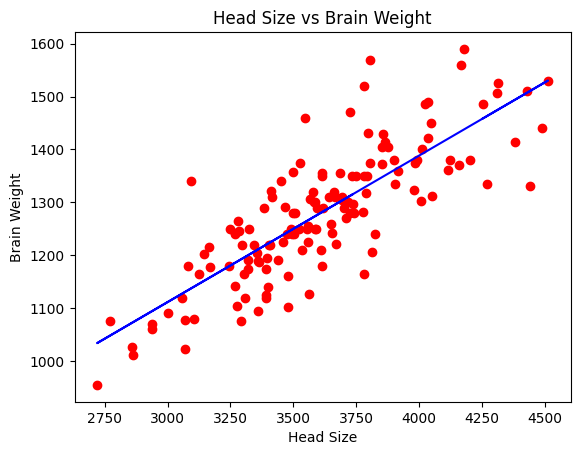

In [19]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lm.predict(x_train),color='blue')
plt.title('Head Size vs Brain Weight')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [24]:
print('y=%0.2f'% lm.coef_,'x+%0.2f'% lm.intercept_)

y=0.28 x+280.59


In [22]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE:',mean_squared_error(y_test,prediction))
print('R2:',r2_score(y_test,prediction))

MSE: 5215.9708919316545
R2: 0.5900649632915873
